<a href="https://colab.research.google.com/github/casjunior93/Tera---Desafio-de-classificacao/blob/main/TERA_Desafio_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio de Detecção e Redução de Fraudes no Setor Financeiro**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


O desafio é propor uma solução para detecção e análise de fraudes que possam reduzir os riscos da empresa de crédito em que trabalho e garantir margens saudáveis.

Link do dataset: https://drive.google.com/file/d/1zjK8zQK5zvhR_r2chWI5dCjeOwASlPfb/view

Vou começar importando as bibliotecas iniciais:

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Agora importo os dados:

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Tera/DESAFIO CLASSIFICAÇÃO/fraud_detection_dataset.csv')

Visualizo as dimensões do dataframe:

In [4]:
df.shape

(6362620, 11)

Vou retornar 10 linhas aleatórias para visualizar o dataframe:

In [5]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
870984,42,PAYMENT,4776.35,C1230126239,26884.00,22107.65,M186658405,0.00,0.00,0,0
1423518,139,PAYMENT,4431.28,C901670124,0.00,0.00,M550541666,0.00,0.00,0,0
2399505,201,PAYMENT,2601.26,C1148125120,23546.00,20944.74,M295466231,0.00,0.00,0,0
3350756,253,CASH_OUT,476228.28,C1511883349,181.00,0.00,C2042350227,113978.03,590206.31,0,0
1405392,139,PAYMENT,18373.84,C915035903,40958.00,22584.16,M156346656,0.00,0.00,0,0
1202677,133,CASH_OUT,236699.28,C1323389735,212441.75,0.00,C1469084143,5728162.72,5964861.99,0,0
1498802,143,PAYMENT,2142.84,C1246497844,45659.00,43516.16,M2065554207,0.00,0.00,0,0
4213213,305,CASH_OUT,26869.28,C1211475405,0.00,0.00,C196053080,188600.00,215469.27,0,0
2645100,209,CASH_OUT,109281.49,C1474984696,0.00,0.00,C151880748,1011244.59,1120526.08,0,0
5146509,356,CASH_IN,135043.48,C1194515139,7806118.23,7941161.71,C1695763340,396132.57,261089.09,0,0


## Conhecendo as features deste dataset:

* `step` - Passo: representa o total de horas transcorrido desde o início da simulação. Esta feature vai variar entre 1 e 744 (30 dias);

* `type` - Tipo: tipo de transação (depósito, saque, débito, pagamento e transferência);

* `amount` - Quantia: total que foi transacionado;

* `nameOrig` - ClienteOrigem: cliente que iniciou a transação

* `oldbalanceOrg` - SaldoInicialOrigem: saldo da conta de origem antes da transação;

* `newbalanceOrig` - SaldoFinalOrigem: saldo da conta de origem após a transação;

* `nameDest` - ClienteDestino: cliente de destino da transação;

* `oldbalanceDest` - SaldoInicialDestino: saldo da conta de destino antes da transação;

* `newbalanceDest` - SaldoFinalDestino: saldo da conta de destino após a transação;

* `isFraud` - ÉFraude: flag que define se a transação é fraudulenta ou não. Nesta simulação o objetivo da fraude é assumir a conta do usuário, esvaziá-la transferindo para outra conta e então sacando o dinheiro.

* `isFlaggedFraud` - SinalizadaComoFraude: automaticamente marcadas pelo banco como fraude por tentarem transferir mais de 200.000 em uma única transação.

# Pré-análise dos dados com SeetViz

Primeiro vou renomear as tabelas para facilitar a análise.

In [6]:
df = df.rename(
    columns={"step":"totalHoras", "type": "tipoTransacao", "amount": "quantia",
             "nameOrig": "clienteOrigem", "oldbalanceOrg": "saldoInicialOrigem",
             "newbalanceOrig": "saldoFinalOrigem", "nameDest": "clienteDestino",
             "oldbalanceDest": "saldoInicialDestino", "newbalanceDest": "saldoFinalDestino",
             "isFraud": "ehFraude", "isFlaggedFraud": "sinalizadaComoFraude"

             })
df.head(3)

,totalHoras,tipoTransacao,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


Agora importo o SweetViz

In [7]:
#!pip install sweetviz
#import sweetviz

O SeetViz gera um relatório em HTML com várias informações sobre as features do dataset.

In [8]:
#analise=sweetviz.analyze(df)
#analise.show_html()

Ao analisar o relatório do SweetViz, vi que o dataset tem 3 features categóricas (tipoTransacao, ehFraude e sinalizadaComoFraude), 6 numéricas (totalHoras, quantia, saldoInicialOrigem, saldoFinalOrigem, saldoInicialDestino e saldoFinalDestino) e 2 textuais (clienteOrigem, clienteDestino). Nenhuma feature tem valores faltantes.

# Tratamento de Dados

Vou tratar a feature categórica tipoTransacao com o método get_dummies do Pandas.

In [9]:
df.tipoTransacao.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
df2 = pd.get_dummies(df.tipoTransacao)

A coluna tipoTransacao tem 5 valores únicos. Com o método get_dummies será criado uma coluna em um novo dataframe para cada valor único. Para cada transação, o tipo dessa transação vai receber o valor 1.

In [11]:
df2.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


Agora concateno o df2 com o dataframe original df.

In [12]:
df3 = pd.concat([df, df2], axis='columns')
df3.sample(10)

,totalHoras,tipoTransacao,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
2199577,185,CASH_IN,30546.27,C640294319,41481.00,72027.27,C1833275561,1208682.31,1178136.04,0,0,1,0,0,0,0
5199926,369,CASH_IN,154053.71,C1876221993,4699870.52,4853924.23,C996655057,1678852.18,1524798.47,0,0,1,0,0,0,0
4047465,300,CASH_OUT,55722.21,C317236156,97963.00,42240.79,C971954069,73601.26,129323.47,0,0,0,1,0,0,0
1968579,178,TRANSFER,334980.49,C1237508861,446958.70,111978.22,C1679254873,4073262.19,4408242.67,0,0,0,0,0,0,1
2035557,180,CASH_OUT,125974.44,C1490122392,0.00,0.00,C248226755,476686.94,602661.38,0,0,0,1,0,0,0
3735630,278,PAYMENT,4639.18,C950166401,0.00,0.00,M1101148729,0.00,0.00,0,0,0,0,0,1,0
4476142,324,CASH_OUT,290447.71,C284617697,0.00,0.00,C1828914674,523867.90,814315.61,0,0,0,1,0,0,0
272344,15,PAYMENT,13074.95,C1957949036,2712.00,0.00,M1262827329,0.00,0.00,0,0,0,0,0,1,0
3903906,284,CASH_IN,78968.42,C377545747,4158244.13,4237212.55,C2122777781,367637.58,288669.16,0,0,1,0,0,0,0
909120,43,PAYMENT,1085.75,C636599544,0.00,0.00,M1461521563,0.00,0.00,0,0,0,0,0,1,0


Agora vou dropar a coluna tipoTransacao.

In [13]:
df3.drop('tipoTransacao', axis='columns', inplace=True)
df3.sample(3)

,totalHoras,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
2716578,211,279953.90,C1514894423,20206457.45,20486411.35,C719819184,611313.29,331359.39,0,0,1,0,0,0,0
1221970,133,271587.68,C216628720,10303.00,0.00,C1158848029,363850.37,635438.04,0,0,0,1,0,0,0
3076030,235,1151725.30,C1864151749,21363.00,0.00,C408803417,2159680.57,3311405.87,0,0,0,0,0,0,1


E renomear as novas colunas

In [14]:
df3 = df3.rename(
    columns={"CASH_IN":"deposito", "CASH_OUT": "saque", "DEBIT": "debito",
             "PAYMENT": "pagamento", "TRANSFER": "transferencia",
             })
df3.head(3)

,totalHoras,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,deposito,saque,debito,pagamento,transferencia
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1


Criando uma nova coluna. Percebi que na metade das transações marcadas como fraude, o valor de saldoFinalOrigem acaba ficando menor que o valor de saldoFinalDestino.

In [15]:
print(f'(Soma das fraudes: {df3.ehFraude.loc[df3.ehFraude == 1].count()})')
print(f'Soma das fraudes onde o saldoFinalDestino é maior que saldoFinalOrigem: {df3.ehFraude.loc[(df3.saldoFinalDestino > df3.saldoFinalOrigem) & df3.ehFraude == 1].count()}')

(Soma das fraudes: 8213)
Soma das fraudes onde o saldoFinalDestino é maior que saldoFinalOrigem: 4122


In [16]:
df3['saldoFinalDestinoMenosSaldoFinalOrigem'] = df3['saldoFinalDestino'] - df3['saldoFinalOrigem']

Criando outra nova coluna com o número de transações que o clienteOrigem iniciou no período e outra com o número de transações que um clienteDestino pode ter participado.

In [17]:
clienteOrigemNP = df3.clienteOrigem.to_numpy()
clienteDestinoNP = df3.clienteDestino.to_numpy()

In [18]:
from collections import Counter

In [19]:
contadorCO = Counter(clienteOrigemNP)
contadorCD = Counter(clienteDestinoNP)

In [20]:
df_contadorCO = pd.DataFrame.from_dict(contadorCO, orient='index').reset_index()
df_contadorCO = df_contadorCO.rename(columns={ 0:'contador'})
df_contadorCO.set_index('index',inplace=True)
df_contadorCO.head(10)

,contador
index,
C1231006815,1
C1666544295,1
C1305486145,1
C840083671,1
C2048537720,1
C90045638,1
C154988899,1
C1912850431,1
C1265012928,1


In [21]:
df_contadorCD = pd.DataFrame.from_dict(contadorCD, orient='index').reset_index()
df_contadorCD = df_contadorCD.rename(columns={0:'contador'})
df_contadorCD.set_index('index',inplace=True)
df_contadorCD.head(10)

,contador
index,
M1979787155,1
M2044282225,1
C553264065,44
C38997010,41
M1230701703,1
M573487274,1
M408069119,1
M633326333,1
M1176932104,1


In [22]:
print(contadorCO['C1305486145'])
print(contadorCD['C553264065'])

1
44


In [23]:
def retorna_transacoes_por_periodo_cliente_origem(df):
    return contadorCO[df.clienteOrigem]

In [24]:
%%time
df3['transacoesClienteOrigemPeriodo'] = df3.apply(retorna_transacoes_por_periodo_cliente_origem, axis=1)

CPU times: user 1min 34s, sys: 1.62 s, total: 1min 36s
Wall time: 1min 36s


Criando outra coluna para o número de transações que o clienteDestino participou.

In [25]:
def retorna_transacoes_por_periodo_cliente_destino(df):
    return contadorCD[df.clienteDestino]

In [26]:
%%time
df3['transacoesClienteDestinoPeriodo'] = df3.apply(retorna_transacoes_por_periodo_cliente_destino, axis=1)

CPU times: user 1min 36s, sys: 1.21 s, total: 1min 37s
Wall time: 1min 37s


Exportando o dataset com as novas features em csv para não ter que ficar horas esperando para montá-lo novamente:

In [27]:
%%time
#df3.to_csv('df3_novas_features.csv', index=False)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


Testando as novas features:

In [28]:
total = df3.clienteDestino.loc[df3['clienteDestino'] == 'C553264065'].count()
total_contadorCD = contadorCD['C553264065']
print(f'Quantas transações o cliente C553264065 recebeu: {total}')
print(f'No dicionário do contador: {total_contadorCD}')
print(f'Em linhas do novo dataframe:')
df3.loc[df3['clienteDestino'] == 'C553264065'].head(5)

Quantas transações o cliente C553264065 recebeu: 44
No dicionário do contador: 44
Em linhas do novo dataframe:


,totalHoras,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,deposito,saque,debito,pagamento,transferencia,saldoFinalDestinoMenosSaldoFinalOrigem,transacoesClienteOrigemPeriodo,transacoesClienteDestinoPeriodo
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1,0.00,1,44
6167,6,109985.65,C570434649,41851.00,0.00,C553264065,0.00,109985.65,0,0,0,0,0,0,1,109985.65,1,44
7903,7,10256.20,C111105514,3766080.24,3776336.45,C553264065,109985.65,99729.44,0,0,1,0,0,0,0,-3676607.01,2,44
16381,8,111622.39,C1457214570,2347.00,0.00,C553264065,99729.44,5254.44,0,0,0,1,0,0,0,5254.44,1,44
20003,8,206097.39,C161724858,1991.12,208088.52,C553264065,211351.84,5254.44,0,0,1,0,0,0,0,-202834.08,1,44


# Análise exploratória dos dados

Visualização das Features x ehFraude

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.pairplot(df3, x_vars=['ehFraude'], y_vars=['saldoInicialOrigemPorQuantia'], hue='ehFraude');

<div>
    <div  style="display: flex;">
        <img src="https://github.com/casjunior93/Tera---Desafio-de-classificacao/blob/main/graficos/totalHoras-ehFraude.png?raw=1" style="height: 250px;">
        <img src="https://github.com/casjunior93/Tera---Desafio-de-classificacao/blob/main/graficos/quantia-ehFraude.png?raw=1" style="height: 250px;">
        <img src="https://github.com/casjunior93/Tera---Desafio-de-classificacao/blob/main/graficos/saldoInicialOrigem-ehFraude.png?raw=1" style="height: 250px;">
    </div>
    <div style="display: flex;">
        <img src="https://github.com/casjunior93/Tera---Desafio-de-classificacao/blob/main/graficos/saldoFinalOrigem-ehFraude.png?raw=1" style="height: 250px;">
        <img src="https://github.com/casjunior93/Tera---Desafio-de-classificacao/blob/main/graficos/saldoInicialDestino-ehFraude.png?raw=1" style="height: 250px;">
        <img src="https://github.com/casjunior93/Tera---Desafio-de-classificacao/blob/main/graficos/saldoFinalDestino-ehFraude.png?raw=1" style="height: 250px;">
    </div>
    <div style="display: flex;">
        <img src="https://github.com/casjunior93/Tera---Desafio-de-classificacao/blob/main/graficos/saldoFinalDestinoMenosSaldoFinalOrigem-ehFraude.png?raw=1" style="height: 250px;">
    </div>
</div>

Visualização da discrepância entre as classes da feature ehFraude. Será necessário um balanceamento.

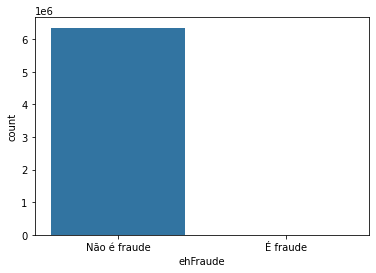

In [30]:
g = sns.countplot(df3.ehFraude)
g.set_xticklabels(['Não é fraude', 'É fraude'])
plt.show();

Identificando correlações entre variáveis através de um mapa de calor.

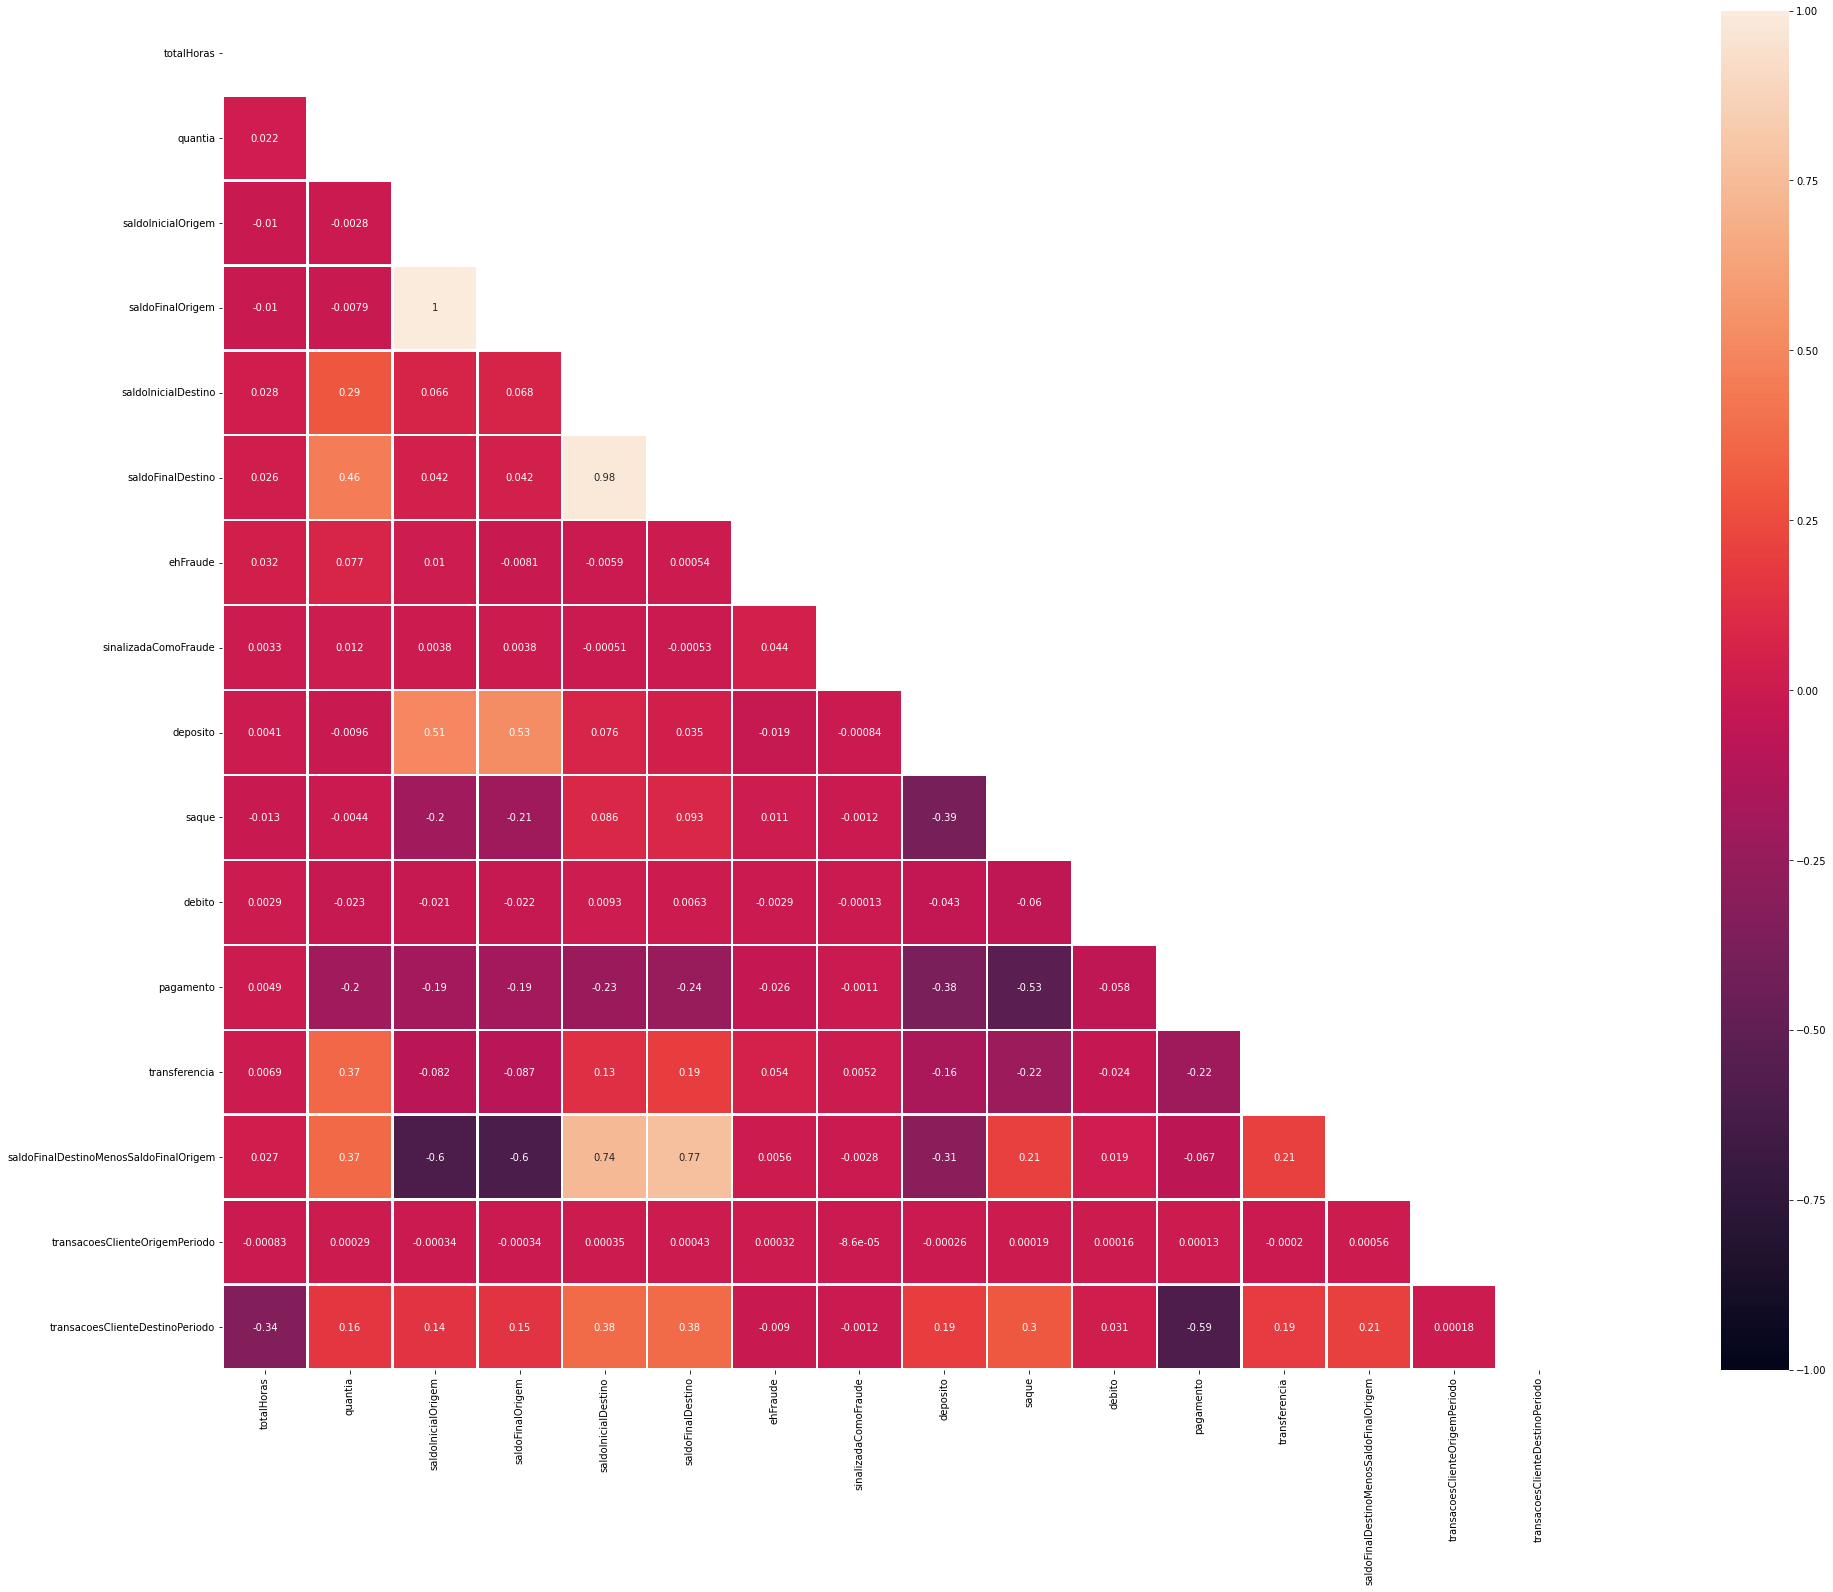

In [31]:
import numpy as np

mask = np.triu(np.ones_like(df3.corr(), dtype=np.bool))
plt.figure(figsize=(50,25))
sns.heatmap(df3.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1, linewidths=1.5)
plt.show();

As features saldoFinalOrigem e saldoInicialOrigem tem um forte correlação (~1) enquanto saldoFinalDestino e saldoInicialDestino também tem uma forte correlação (0.98). A feature saldoFinalDestinoMenosSaldoFinalOrigem que criei também tem uma alta correlação com as features saldoInicialDestino e saldoFinalDestino, 0.74 e 0.77, respectivamente.

# Dividindo o dataset em treino e teste

Definindo as colunas que vamos usar e a variável target.

In [32]:
variaveis = df3[["totalHoras", "quantia", "saldoFinalOrigem", "saldoFinalDestino", "sinalizadaComoFraude", "saque", "deposito", "pagamento", "debito", "transferencia", "transacoesClienteDestinoPeriodo", "transacoesClienteOrigemPeriodo"]]
target = df3.ehFraude

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(variaveis, target, test_size=0.25, random_state=101)

# Balanceamento da base de treino

Importando os recursos necessários

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

## Logistic Regression - Baseline

In [35]:
logreg_baseline = LogisticRegression(max_iter=200)
logreg_baseline.fit(X_train, y_train)
y_pred_baseline = logreg_baseline.predict(X_test)
confusion_matrix(y_test, y_pred_baseline)

array([[1588450,     188],
       [   1891,     126]])

In [36]:
print(classification_report(y_test, y_pred_baseline, target_names=['Não Fraude', 'Fraude']))

              precision    recall  f1-score   support

  Não Fraude       1.00      1.00      1.00   1588638
      Fraude       0.40      0.06      0.11      2017

    accuracy                           1.00   1590655
   macro avg       0.70      0.53      0.55   1590655
weighted avg       1.00      1.00      1.00   1590655



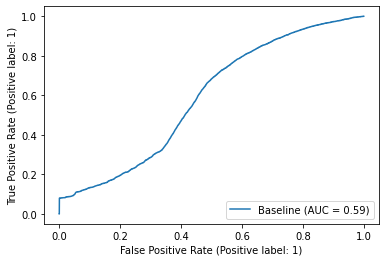

In [37]:
metrics.plot_roc_curve(logreg_baseline, X_train, y_train, name='Baseline')
plt.show()

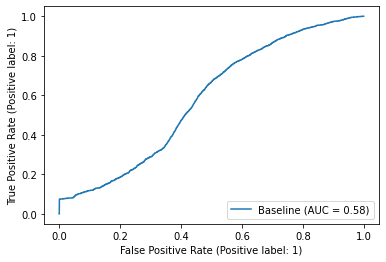

In [38]:
metrics.plot_roc_curve(logreg_baseline, X_test, y_test, name='Baseline')
plt.show()

## Logistic Regression - Classes Weights ('balanced')

In [39]:
logreg_balanced = LogisticRegression(class_weight='balanced')
logreg_balanced.fit(X_train, y_train)
y_pred = logreg_balanced.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[726996, 861642],
       [   197,   1820]])

In [40]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

              precision    recall  f1-score   support

  Não Fraude       1.00      0.46      0.63   1588638
      Fraude       0.00      0.90      0.00      2017

    accuracy                           0.46   1590655
   macro avg       0.50      0.68      0.32   1590655
weighted avg       1.00      0.46      0.63   1590655



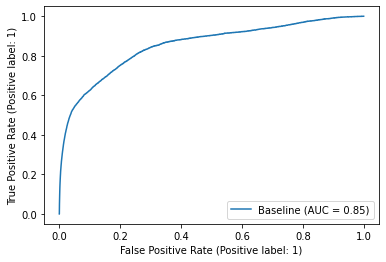

In [41]:
metrics.plot_roc_curve(logreg_balanced, X_train, y_train, name='Baseline')
plt.show()

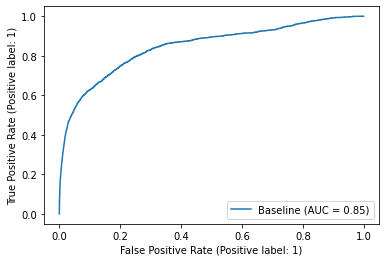

In [42]:
metrics.plot_roc_curve(logreg_balanced, X_test, y_test, name='Baseline')
plt.show()

## Logistic Regression - Classes Weights (custom)

In [43]:
logreg_balanced_custom = LogisticRegression(class_weight={0: 0.15,1: 0.85})
logreg_balanced_custom.fit(X_train, y_train)
y_pred = logreg_balanced_custom.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1583050,    5588],
       [   1718,     299]])

In [44]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

              precision    recall  f1-score   support

  Não Fraude       1.00      1.00      1.00   1588638
      Fraude       0.05      0.15      0.08      2017

    accuracy                           1.00   1590655
   macro avg       0.52      0.57      0.54   1590655
weighted avg       1.00      1.00      1.00   1590655



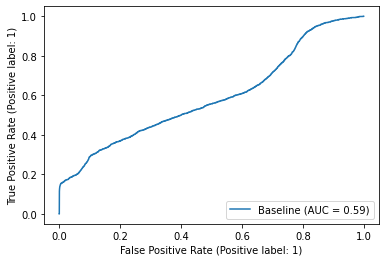

In [45]:
metrics.plot_roc_curve(logreg_balanced_custom, X_test, y_test, name='Baseline')
plt.show()

## Logistic Regression - Over-sampling

### Random

In [46]:
from imblearn.over_sampling import RandomOverSampler

In [47]:
sm = RandomOverSampler(random_state=42, sampling_strategy=0.22)
X_over, y_over = sm.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_over))

Resultado após o oversampling Counter({0: 4765769, 1: 1048469})


In [48]:
logreg_random = LogisticRegression()
logreg_random.fit(X_over, y_over)
y_pred = logreg_random.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1532022,   56616],
       [   1243,     774]])

In [49]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

              precision    recall  f1-score   support

  Não Fraude       1.00      0.96      0.98   1588638
      Fraude       0.01      0.38      0.03      2017

    accuracy                           0.96   1590655
   macro avg       0.51      0.67      0.50   1590655
weighted avg       1.00      0.96      0.98   1590655



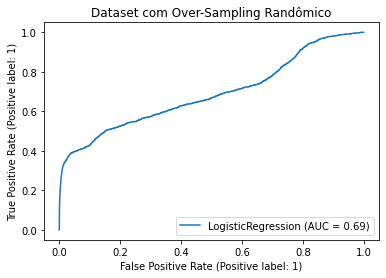

In [50]:
metrics.plot_roc_curve(logreg_random, X_test, y_test)
plt.title("Dataset com Over-Sampling Randômico")
plt.show()

### ADASYN

In [51]:
from imblearn.over_sampling import ADASYN

sm = ADASYN(random_state=42, sampling_strategy=0.22)
X_over, y_over = sm.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_over))

Resultado após o oversampling Counter({0: 4765769, 1: 1049660})


In [52]:
logreg_adasyn = LogisticRegression()
logreg_adasyn.fit(X_over, y_over)
y_pred = logreg_adasyn.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred)

array([[1540927,   47711],
       [   1295,     722]])

In [54]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

              precision    recall  f1-score   support

  Não Fraude       1.00      0.97      0.98   1588638
      Fraude       0.01      0.36      0.03      2017

    accuracy                           0.97   1590655
   macro avg       0.51      0.66      0.51   1590655
weighted avg       1.00      0.97      0.98   1590655



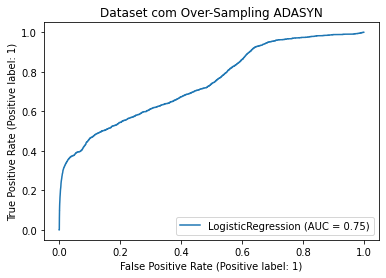

In [55]:
metrics.plot_roc_curve(logreg_adasyn, X_test, y_test)
plt.title("Dataset com Over-Sampling ADASYN")
plt.show()

### SMOTE

In [56]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy=0.22)
X_over, y_over = sm.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_over))

Resultado após o oversampling Counter({0: 4765769, 1: 1048469})


In [57]:
logreg_smote = LogisticRegression()
logreg_smote.fit(X_over, y_over)
y_pred = logreg_smote.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1532255,   56383],
       [   1243,     774]])

In [58]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

              precision    recall  f1-score   support

  Não Fraude       1.00      0.96      0.98   1588638
      Fraude       0.01      0.38      0.03      2017

    accuracy                           0.96   1590655
   macro avg       0.51      0.67      0.50   1590655
weighted avg       1.00      0.96      0.98   1590655



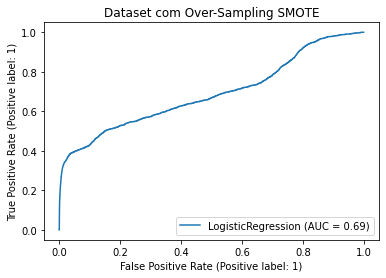

In [59]:
metrics.plot_roc_curve(logreg_smote, X_test, y_test)
plt.title("Dataset com Over-Sampling SMOTE")
plt.show()

## Logistic Regression - Under-sampling

### Cluster Centroids

In [60]:
#from imblearn.under_sampling import ClusterCentroids 

#print('Antes %s' % Counter(y_train))
#cc = ClusterCentroids(random_state=42, sampling_strategy=0.35)
#X_under, y_under = cc.fit_resample(X_train, y_train)
#print('Resultado após o under sampling %s' % Counter(y_under))

In [61]:
#logreg = LogisticRegression()
#logreg.fit(X_under, y_under)
#y_pred = logreg.predict(X_test)

In [62]:
#confusion_matrix(y_test, y_pred)

In [63]:
#print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

In [64]:
#logreg_balanced_disp = metrics.plot_roc_curve(logreg, X_test, y_test, name='Under-sampling - Centroids')

### Randômico

In [65]:
from imblearn.under_sampling import RandomUnderSampler 

print('Antes %s' % Counter(y_train))
cc = RandomUnderSampler(random_state=42, sampling_strategy=0.35)
X_under, y_under = cc.fit_resample(X_train, y_train)
print('Resultado após o under sampling %s' % Counter(y_under))

Antes Counter({0: 4765769, 1: 6196})
Resultado após o under sampling Counter({0: 17702, 1: 6196})


In [66]:
logreg_under_random = LogisticRegression()
logreg_under_random.fit(X_under, y_under)
y_pred = logreg_under_random.predict(X_test)

In [67]:
confusion_matrix(y_test, y_pred)

array([[1494358,   94280],
       [   1086,     931]])

In [68]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

              precision    recall  f1-score   support

  Não Fraude       1.00      0.94      0.97   1588638
      Fraude       0.01      0.46      0.02      2017

    accuracy                           0.94   1590655
   macro avg       0.50      0.70      0.49   1590655
weighted avg       1.00      0.94      0.97   1590655



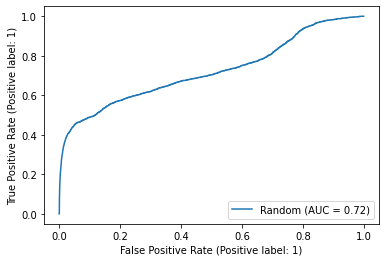

In [69]:
logreg_balanced_disp = metrics.plot_roc_curve(logreg_under_random, X_test, y_test, 
                                              name='Random')

## Over sampling e Under sampling

### Proporção de 1:2

In [70]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42, sampling_strategy=0.5)

print('Antes %s' % Counter(y_train))

X_res, y_res = sme.fit_resample(X_train, y_train)
print('Resultado após a aplicação das duas estratégias combinadas %s' % Counter(y_res))

Antes Counter({0: 4765769, 1: 6196})
Resultado após a aplicação das duas estratégias combinadas Counter({0: 4459655, 1: 2168907})


In [71]:
logreg_prop12 = LogisticRegression()
logreg_prop12.fit(X_res, y_res)
y_pred = logreg_prop12.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1431544,  157094],
       [    872,    1145]])

In [72]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

              precision    recall  f1-score   support

  Não Fraude       1.00      0.90      0.95   1588638
      Fraude       0.01      0.57      0.01      2017

    accuracy                           0.90   1590655
   macro avg       0.50      0.73      0.48   1590655
weighted avg       1.00      0.90      0.95   1590655



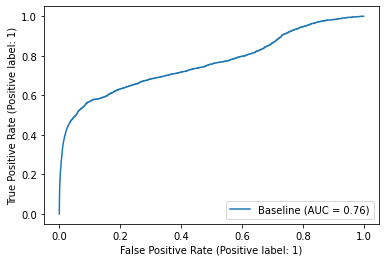

In [73]:
metrics.plot_roc_curve(logreg_prop12, X_test, y_test, name='Baseline')
plt.show()

### Proporção de 1:10

In [74]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42, sampling_strategy=0.1)

print('Antes %s' % Counter(y_train))

X_res, y_res = sme.fit_resample(X_train, y_train)
print('Resultado após a aplicação das duas estratégias combinadas %s' % Counter(y_res))

Antes Counter({0: 4765769, 1: 6196})
Resultado após a aplicação das duas estratégias combinadas Counter({0: 4564644, 1: 331727})


In [75]:
logreg_prop110 = LogisticRegression()
logreg_prop110.fit(X_res, y_res)
y_pred = logreg_prop110.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1546313,   42325],
       [   1272,     745]])

In [76]:
print(classification_report(y_test, y_pred, target_names=['Não Fraude', 'Fraude']))

              precision    recall  f1-score   support

  Não Fraude       1.00      0.97      0.99   1588638
      Fraude       0.02      0.37      0.03      2017

    accuracy                           0.97   1590655
   macro avg       0.51      0.67      0.51   1590655
weighted avg       1.00      0.97      0.98   1590655



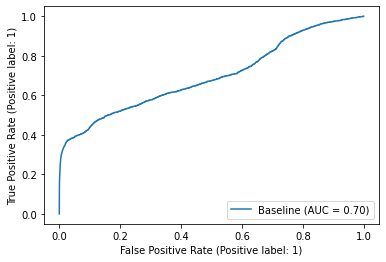

In [78]:
metrics.plot_roc_curve(logreg_prop110, X_test, y_test, name='Baseline')
plt.show()

# Sem balanceamento da base de treino

In [84]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, precision_score, plot_roc_curve

## Regressão logística

In [82]:
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

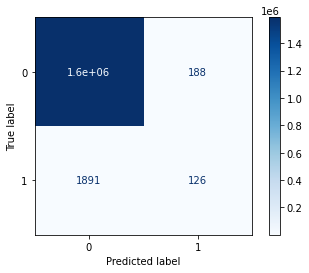

In [85]:
plot_confusion_matrix(lr, X_test, y_test, cmap='Blues');

In [86]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_lr)}\n\Precisão: {precision_score(y_test, y_pred_lr)}\n\
      Recall: {recall_score(y_test, y_pred_lr)}')

Acurácia: 0.9986929912520314
\Precisão: 0.4012738853503185
      Recall: 0.06246901338621715


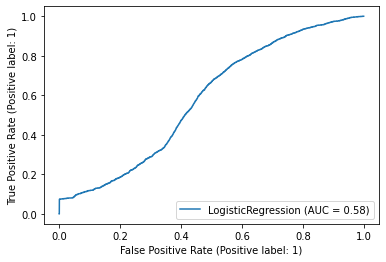

In [87]:
plot_roc_curve(lr, X_test, y_test);

## SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [ ]:
plot_confusion_matrix(svm, X_test, y_test, cmap='Blues');

In [ ]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_svm)}\n\Precisão: {precision_score(y_test, y_pred_svm)}\n\
      Recall: {recall_score(y_test, y_pred_svm)}')

In [ ]:
plot_roc_curve(svm, X_test, y_test);

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
plot_confusion_matrix(knn, X_test, y_test, cmap='Blues')

In [ ]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_knn)}\n\Precisão: {precision_score(y_test, y_pred_knn)}\n\
      Recall: {recall_score(y_test, y_pred_knn)}')

In [ ]:
plot_roc_curve(knn, X_test, y_test);

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [ ]:
plot_confusion_matrix(nb, X_test, y_test, cmap='Blues');

In [ ]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_nb)}\n\Precisão: {precision_score(y_test, y_pred_nb)}\n\
      Recall: {recall_score(y_test, y_pred_nb)}')

In [ ]:
plot_roc_curve(nb, X_test, y_test);

## Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
y_pred_dtree = nb.predict(X_test)

In [ ]:
plot_confusion_matrix(dtree, X_test, y_test, cmap='Blues');

In [ ]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_dtree)}\n\Precisão: {precision_score(y_test, y_pred_dtree)}\n\
      Recall: {recall_score(y_test, y_pred_dtree)}')

In [ ]:
plot_roc_curve(dtree, X_test, y_test);

## Comparando os modelos sem balanceamento:

In [ ]:
classifiers = [lr, svm, knn, nb, dtree]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)